In [2]:
import numpy as np

In [3]:
def mapAge(x, l, h):
    return (x - l) / h

def rMapAge(p, l, h):
    return (p * h) + l

def mapBinary(x):
    if x >= 0.5:
        return True
    return False

In [4]:
training_data_int = np.random.randint(low=13, high=80, size=10000, dtype='int32')
labels_arr = []
for x in training_data_int:
    if x > 45:
        labels_arr.append(True)
    else:
        labels_arr.append(False)

In [5]:
training_data = np.array([mapAge(x, 13, 80) for x in training_data_int], dtype='float64')
labels = np.array(labels_arr, dtype='bool')


In [6]:
testing_data_int = np.random.randint(low=13, high=80, size=10, dtype='int32')
test_labels_arr = []
for x in testing_data_int:
    if (x > 45):
        test_labels_arr.append(True)
    else:
        test_labels_arr.append(False)

In [7]:
testing_data = np.array([mapAge(x, 13, 80) for x in testing_data_int], dtype='float64')
test_labels = np.array(test_labels_arr, dtype='bool')

In [8]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import Adam

Using Theano backend.


In [15]:
model = Sequential([
    Dense(16, input_shape=(1,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_8 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 609
Trainable params: 609
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model

In [29]:
model.fit(training_data, labels, batch_size=100, epochs=50, verbose=1)
model

Epoch 1/50
10000/10000 [==============================] - 0s 17us/step - loss: 0.0443 - accuracy: 0.9969
Epoch 2/50
10000/10000 [==============================] - 0s 22us/step - loss: 0.0375 - accuracy: 0.9983
Epoch 3/50
10000/10000 [==============================] - 0s 25us/step - loss: 0.0326 - accuracy: 0.9979
Epoch 4/50
10000/10000 [==============================] - 0s 26us/step - loss: 0.0292 - accuracy: 0.9992
Epoch 5/50
10000/10000 [==============================] - 0s 28us/step - loss: 0.0264 - accuracy: 0.9989
Epoch 6/50
10000/10000 [==============================] - 0s 18us/step - loss: 0.0246 - accuracy: 0.9981
Epoch 7/50
10000/10000 [==============================] - 0s 37us/step - loss: 0.0231 - accuracy: 0.9989
Epoch 8/50
10000/10000 [==============================] - 0s 30us/step - loss: 0.0215 - accuracy: 0.9998
Epoch 9/50
10000/10000 [==============================] - 0s 29us/step - loss: 0.0202 - accuracy: 0.9990
Epoch 10/50
10000/10000 [==============================

In [18]:
loss = model.evaluate(testing_data, test_labels)
loss

10/10 [==============================] - 0s 27us/step


[0.003525644075125456, 1.0]

In [19]:
predict = model.predict(testing_data, batch_size=10, verbose=1)
predict_m = [mapBinary(x) for x in predict]
predict_map = np.array(predict_m, dtype='bool')

10/10 [==============================] - 0s 17us/step


In [26]:
import pandas as pd
import matplotlib as plt
import seaborn as sbn

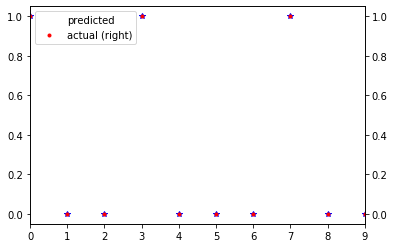

In [27]:
sp = pd.Series(data=predict_map, dtype='int32', name='predicted')
sa = pd.Series(data=test_labels, dtype='int32', name='actual')
df = pd.DataFrame(data=[sp,sa]).transpose()
fig, ax = plt.pyplot.subplots()
df.predicted.plot(ax=ax, style='b*', legend = True)
df.actual.plot(ax=ax, style='r.', secondary_y=True, legend = True)

